# Data Preprocessing

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
#獲取當前路徑
import os
os.chdir('/Users/shiliu/Downloads')
os.getcwd()

dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
# take all the lines
# take all the Age and Estimated Salary column
y = dataset.iloc[:, 4].values
# take all the lines
# take the Purchased column
# vector
pd.DataFrame(X)

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
5,27,58000
6,27,84000
7,32,150000
8,25,33000
9,35,65000


Split the dataset into a training set and a test set

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size = 0.25, 
                                                     random_state = 0)
#test_size = 0.2 = 20%

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Fitting the classifier the Training set

Create your classifier here

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


Making the Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)
# 3+4 incorrect predictions

,0,1
0,64,4
1,3,29


Visualising the Training set ( Linear Classifier )

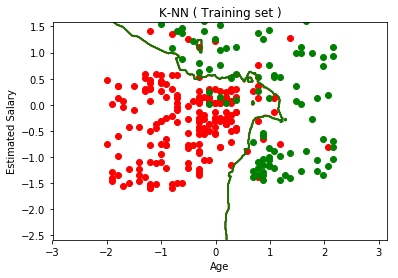

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() +1,
                              step = 0.01), 
                    np.arange(start = X_set[:, 1].min() -1,
                             stop = X_set[: 1].max() +1,
                             step = 0.01))

plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN ( Training set )')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# red = 0(didnt buy), green = 1(buy)

Visualising the Test set ( Linear Classifier )

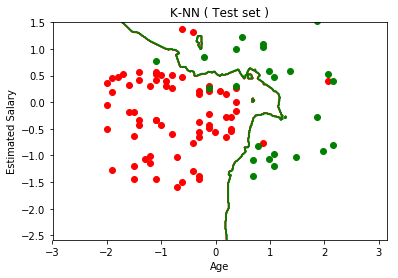

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                               stop = X_set[:, 0].max() +1,
                              step = 0.01), 
                    np.arange(start = X_set[:, 1].min() -1,
                             stop = X_set[: 1].max() +1,
                             step = 0.01))

plt.contour(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('K-NN ( Test set )')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# red = 0(didnt buy), green = 1(buy)